<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *1*: *Data Preprocessing & Dimensionality Reduction***

###**Tenggat Waktu: 14 Maret 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **14 Maret 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [132]:
# Isi dengan data diri Anda
NAMA = "Muhammad Faisal Adi Soesatyo"
KELAS = "B"
NPM = "1906293184"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
             "https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f",
             "https://www.educative.io/blog/one-hot-encoding",
             "https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6",
             "https://github.com/GDhasade/Medium.com_Contents/blob/master/Handle_Categorical_Data.ipynb",
             "https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa",
             "https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60",
             "https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b",
             "https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"
]

In [133]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Faisal Adi Soesatyo dari kelas B dengan NPM 1906293184, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Faisal Adi Soesatyo)


In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Preprocessing

Diberikan sebuah dataset penyewaan apartemen di Moscow. Dataset memiliki atribut sebagai berikut (https://www.kaggle.com/timmofeyy/realestaterent dengan perubahan):


*   id
*   metro: nama stasiun terdekat dari apartemen
*   price: harga sewa apartemen
*   way: cara mengakses stasiun (jalan kaki atau transportasi umum)
*   views: jumlah orang yang melihat apartemen tersebut
*   provider: orang atau agensi yang menyewakan apartemen (realtor, owner, developer, agency)
*   fee_percent: persentase biaya agensi atau pemilik apartemen
* storey: lantai di mana apartemen berada
* minutes: waktu yang dibutuhkan untuk sampai ke stasiun (metro)
* storeys: total jumlah lantai di apartemen tersebut
* living_area: luas living area suatu apartemen
* kitchen_area: luas dapur
* total_area: luas total apartemen

Tujuan akhir dari pemrosesan data nantinya adalah untuk memprediksi atribut price. Lakukanlah visualisasi dan pemrosesan data untuk mempersiapkan data dengan mengerjakan soal-soal berikut:

## Soal 1
[5] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik)! Tampilkan pula setiap kategori pada atribut kategorik!



In [135]:
df = pd.read_csv('move-rev.csv')

# Total data and total attributes (numeric & categoric)
total_rows, total_attributes = df.shape
print("Total data:", total_rows)
print("Total attributes:", total_attributes)
print()

# Info about attributes
display(df.info())
print()

# Statistics of each attributes
numericData = df.drop(columns = df.columns[0]).describe() #decide to drop the id
categoricData = df.describe(include = object)
display(numericData)
display(categoricData)

Total data: 1446
Total attributes: 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1446 non-null   int64 
 1   metro         1409 non-null   object
 2   price         1446 non-null   int64 
 3   way           1446 non-null   object
 4   views         1446 non-null   int64 
 5   provider      1446 non-null   object
 6   fee_percent   1446 non-null   int64 
 7   storey        1446 non-null   int64 
 8   minutes       1446 non-null   int64 
 9   storeys       1446 non-null   int64 
 10  living_area   1446 non-null   int64 
 11  kitchen_area  1446 non-null   int64 
 12  total_area    1446 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 147.0+ KB


None

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


,metro,way,provider
count,1409,1446,1446
unique,118,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


## Soal 2
[10] Apa itu One Hot Encoding? Apakah Dataset ini membutuhkan langkah pra-pemrosesan ini? Jelaskan argumen anda dan lakukan implementasi pada data apabila one hot encoding dibutuhkan!

One hot encoding adalah suatu teknik preprocessing yang bertujuan untuk mengubah categorical data menjadi bentuk yang dapat dipahami oleh ML algorithm, yakni bentuk binary 0 dan 1. Mengingat ML algorithm tidak dapat memahami dan memproses data yang berbentuk categorical (mengandung text), maka dari itu perlu bagi kita untuk mengubah semua variable/attribute pada data yang merupakan categorical variable.

Mengingat pada data ini terdapat tiga jenis categorical attributes, yakni **metro**, **way** dan **provider**. Maka perlu bagi saya untuk melakukan teknik preprocessing one hot encoding ini. Tujuannya adalah untuk memastikan bahwa hasil yang saya dapat setelah dilakukannya proses ML algorithm, dapat memberikan hasil yang tepat, sesuai dan memuaskan.

In [136]:
one_hot_encoded_df = pd.get_dummies(df)
metro_one_hot_encoded_df = pd.get_dummies(df['metro'], prefix = 'Metro')
way_one_hot_encoded_df = pd.get_dummies(df['way'], prefix = 'Way')
provider_one_hot_encoded_df = pd.get_dummies(df['provider'], prefix = 'Provider')

display(one_hot_encoded_df)
display(metro_one_hot_encoded_df)
display(way_one_hot_encoded_df)
display(provider_one_hot_encoded_df)

,Unnamed: 0,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area,...,metro_Ziablikovo,way_transport,way_walk,provider_agency,provider_agency,provider_agency,provider_developer,provider_owner,provider_realtor,provider_realtor
0,0,45000,513,50,7,10,12,19,8,38,...,0,0,1,0,0,0,0,0,0,1
1,1,50000,389,50,16,10,16,18,8,41,...,0,0,1,0,0,0,0,0,0,1
2,2,50000,483,50,5,3,12,19,5,33,...,0,0,1,0,0,0,0,0,0,1
3,3,38000,414,50,3,15,5,37,37,37,...,0,0,1,0,0,0,0,0,0,1
4,4,55999,360,99,6,7,17,21,10,40,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,1441,25000,189,0,6,5,23,20,10,36,...,0,0,1,0,0,0,0,0,1,0
1442,1442,25000,173,0,5,5,17,20,10,38,...,0,0,1,0,0,0,0,0,1,0
1443,1443,25000,102,0,5,5,12,20,10,35,...,0,0,1,0,0,0,0,0,1,0
1444,1444,40000,60,30,3,17,9,20,8,35,...,0,0,1,0,0,0,0,0,1,0


,Metro_Akademicheskaia,Metro_Alekseevskaia,Metro_Altufevo,Metro_Annino,Metro_Arbatskaia,Metro_Aviamotornaia,Metro_Bagrationovskaia,Metro_Baumanskaia,Metro_Beliaevo,Metro_Belomorskaia,...,Metro_Ulitca Dmitrievskogo,Metro_Ulitca Starokachalovskaia,Metro_Universitet,Metro_VDNKh,Metro_Vladykino,Metro_Vodnyi stadion,Metro_Volzhskaia,Metro_Vystavochnaia,Metro_Zhulebino,Metro_Ziablikovo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1442,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Way_transport,Way_walk
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1441,0,1
1442,0,1
1443,0,1
1444,0,1


,Provider_agency,Provider_agency,Provider_agency,Provider_developer,Provider_owner,Provider_realtor,Provider_realtor
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1441,0,0,0,0,0,1,0
1442,0,0,0,0,0,1,0
1443,0,0,0,0,0,1,0
1444,0,0,0,0,0,1,0


## Soal 3
[10] Lakukan penanganan terhadap data kategorik! Sebutkan pula alasan mengapa menggunakan teknik penanganan tersebut

saya akan menggunakan teknik **target encoding** ketimbang **one-hot encoding**. kenapa demikian? karena berdasarkan sumber yang saya pelajari, mendapati informasi bahwa one-hot encoding kurang ideal untuk distance-based algorithm seperti clustering models karena tingginya jumlah data binary value.

Pada teknik target encoding ini saya akan menjadikan price sebagai target variable (patokan) dalam penghitungan target encoding. Sehingga akan didapatkan target encoding metro relative terhadap price, way relative terhadap price dan provider relative terhadap price.

In [137]:
# based on question #1, only metro has null value. so, I need to handle it first

# handle null value in attribute metro
most_frequent_item = df['metro'].mode()[0]
df['metro'].fillna(most_frequent_item, inplace = True)
# display(df.info())

# method to populate rank in categorical attributes
def encode_categorical_with_price(column):
  attr_encoding = df.groupby([column])['price'].mean().sort_values().index
  attr_encoding_rank = { k:i for i, k in enumerate(attr_encoding, 0) }
  new_column = f'{column}_encoded'
  df[new_column] = df[column].map(attr_encoding_rank)

# loop to display the result
for column in ['metro', 'way', 'provider']:
  encode_categorical_with_price(column)
  encoded_string = f'{column}_encoded'
  display(df[[column, encoded_string]])

,metro,metro_encoded
0,Planernaia,44
1,VDNKh,53
2,Alekseevskaia,66
3,Sviblovo,36
4,Rimskaia,70
...,...,...
1441,Solntcevo,16
1442,Ulitca Starokachalovskaia,14
1443,Zhulebino,10
1444,Preobrazhenskaia ploshchad,39


,way,way_encoded
0,walk,1
1,walk,1
2,walk,1
3,walk,1
4,walk,1
...,...,...
1441,walk,1
1442,walk,1
1443,walk,1
1444,walk,1


,provider,provider_encoded
0,realtor,2
1,realtor,2
2,realtor,2
3,realtor,2
4,realtor,2
...,...,...
1441,realtor,0
1442,realtor,0
1443,realtor,0
1444,realtor,0


## Soal 4
[15] Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! Gunakan setidaknya 3 jenis visualisasi untuk membantu anda melakukan analisis! (Hint: Anda bisa mencari hubungan antar atribut dan melakukan visualisasi sederhana dari atribut tertentu)


Saya tertarik untuk mengeksplorasi attribute price. Kenapa demikian? Karena pada akhirnya sebagian besar orang akan melibatkan faktor price dalam pengambilan keputusannya. Misalkan rasio minutes dengan price, rasio living_area dengan price, rasio kitchen_area dengan price, dst. Itulah mengapa saya tertarik untuk menggunakan price dalam eksplorasi ini.

In [138]:
from numpy.polynomial.polynomial import polyfit

descriptive_stats_price = pd.DataFrame(df.describe()['price'])

# create method to show relation between attributes
def relation_between_price_and_other(attr):
  price = df['price']
  attr_data = df[attr]
  df.plot.scatter(x=f"{attr}", y="price", figsize = (6,4))
  b, m = polyfit(attr_data, price, 1)
  plt.plot(attr_data, b + m * attr_data, '-')
  plt.show()

# relation_between_price_and_other('minutes') #price and minutes
# relation_between_price_and_other('total_area') #price and total_area
# relation_between_price_and_other('kitchen_area') #price and kitchen_area
# relation_between_price_and_other('living_area') #price and living_area

In [139]:
# create method to show data in each categorical using bars
sns.set(rc={'figure.figsize':(11.7,8.27)})
def countplot(column, df):
    return sns.countplot(x=column, data=df)

# countplot('minutes', df)
# countplot('way', df)
# countplot('provider', df)

In [140]:
import plotly.express as px
data_clean = df[df['price'] < 80000]

data_clean_minutes = data_clean[data_clean['minutes'] < 20]
fig_minutes = px.box(data_clean_minutes, x='minutes', y='price')
# fig_minutes.show()

fig_kitchen_area = px.box(data_clean, x='kitchen_area', y='price')
# fig_kitchen_area.show()

fig_living_area = px.box(data_clean, x='living_area', y='price')
# fig_living_area.show()

**Kesimpulan yang dapat saya tarik dari hasil eksplorasi diatas adalah**,\
Pengaruh terkuat terdapat pada faktor harga. Dapat dilihat pada scatterplot bahwa mayoritas orang memilih harga apartment dibawah 100,000. Bahkan apabila diperbesar menggunakan box, mayoritas orang memilih apartment berharga dibawah 60,000

**Terdapat kaitan antara harga apartment dengan jarak antara apartment dengan stasiun metro terdekat**\
Hal ini dikuatkan dengan bukti visualisasi yang terdapat pada scatterplot, countplot(bar) dan boxplot. Rata-rata masyarakat menyenangi apartment yang jarak ke stasiun terdekat < 20 menit, dari masing-masing visualisasi pun dapat terlihat. Hal ini pun dirasa masuk akal mengingat kecenderungan orang memilih jalan kaki untuk menuju stasiun terdekat ketimbang menggunakan public transportation.

**Terdapat kaitan antara harga apartment dengan total_area apartment**\
Sebagian besar masyarakat menginginkan apartment yang memiliki luas yang cukup namun dengan harga yang tetap terjangkau. Hal ini dapat dilihat pada visualisasi scatterplot, terlihat bahwa sebagian besar masyarakat menginginkan apartment dengan luas sekitar 30-45 namun dengan harga tetap < 100,000.

**Terdapat kaitan antara harga apartment dengan kitchen_area & living_area**\
Orang cenderung memilih untuk memiliki living_area yang lebih besar ketimbang memiliki kitchen_area yang lebih besar. Hal ini dapat terlihat pada visualisasi scatter plot dan box plot. Pada apartment dengan harga < 100,000; ukuran kitchen_area yang diidamkan orang terdapat pada 5-12 dan ukuran living_area terdapat pada 15-22. Selain itu persebaran dapat terlihat lebih jelas pada boxplot.

## Soal 5
[10] Lakukan penanganan terhadap missing values, duplikasi data, dan outliers jika ada! Sebutkan pula alasan mengapa menggunakan teknik tersebut

Jika tidak ada, tunjukkan proses atau jelaskan mengapa hal-hal tersebut tidak ada.

In [141]:
# missing values
# Terkait missing values sudah saya handle pada nomor 3 terkait handling categorical data
# Kebetulan pada dataset ini, hanya attribute metro yang memiliki null value

# method to detect data duplication
def detect_duplication(column):
  return df[column].duplicated()

# data duplication
detect_duplication_metro = detect_duplication('metro')
detect_duplication_way = detect_duplication('way')
detect_duplication_provider = detect_duplication('provider')

# display(detect_duplication_metro)
# display(detect_duplication_way)
# display(detect_duplication_provider)

# handle data duplication using drop duplicates
# display(df['metro'].drop_duplicates())
# display(df['way'].drop_duplicates())
# display(df['provider'].drop_duplicates())

# outliers
"""
Sebernarnya terdapat cukup banyak outliers pada data yang saya temukan saat
melakukan eksplorasi pada nomor 4, beberapa attribute yang saya curigai mengandung
outlier diantaranya adalah price, storey dan storeys
"""

# method to count number of outliers
supl = []
def count_outliers(column):
  attr = df[column]
  q1, q3= np.percentile(attr, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr)
  supl.append(lower_bound)
  supl.append(upper_bound)
  number_of_outliers = ((attr < lower_bound) | (attr > upper_bound)).sum()
  return number_of_outliers

price_num = count_outliers('price')
storey_num = count_outliers('storey')
storeys_num = count_outliers('storeys')

# display(price_num)
# display(storey_num)
# display(storeys_num)

# Handle outliers

# MEAN, MEDIAN, MODE data with outlier

# display data with outlier
with_outlier = []
def data_with_outlier(column):
  with_outlier.append(np.mean(df[column]))
  with_outlier.append(np.median(df[column]))
  with_outlier.append(df[column].mode()[0])
  with_outlier.append(np.var(df[column]))
  with_outlier.append(np.std(df[column]))

  print(f'### {column} ###')
  print("with_outlier_mean:", with_outlier[0])
  print("with_outlier_median:", with_outlier[1])
  print("with_outlier_mode:", with_outlier[2])
  print("with_outlier_variance:", with_outlier[3])
  print("with_outlier_std:", with_outlier[4])
  print()

# MEAN, MEDIAN, MODE data without outlier

# display data without outlier
without_outlier_container = []
def data_without_outlier(column):
  without_outlier = [x for x in df[column] if (x > supl[0]) and (x < supl[1])]
  without_outlier_container.append(np.mean(without_outlier))
  without_outlier_container.append(np.median(without_outlier))
  without_outlier_container.append(df[column].mode()[0])
  without_outlier_container.append(np.var(without_outlier))
  without_outlier_container.append(np.std(without_outlier))

  print("without_outlier_mean:", without_outlier_container[0])
  print("without_outlier_median:", without_outlier_container[1])
  print("without_outlier_mode:", without_outlier_container[2])
  print("without_outlier_variance:", without_outlier_container[3])
  print("without_outlier_std:", without_outlier_container[4])
  print()

# data_with_outlier('price')
# data_without_outlier('price')
# data_with_outlier('storey')
# data_without_outlier('storey')
# data_with_outlier('storeys')
# data_without_outlier('storeys')

**Missing Values**
Terkait missing values, saya memutuskan untuk mengisi dengan modus dari attribute tersebut. Alasannya karena pada categorical data sulit untuk mengisi dengan hal lain, seperti mean, mode, dsb. Selain itu menurut saya, mengingat hanya attribute metro yang mengandung missing value, dirasa kurang sesuai apabila row tersebut saya drop. Khawatir akan berdampak pada attribute lain yang tidak mengandung missing value.

**Data Duplication**
Pada data duplication, saya mencari data duplication hanya pada attribute yang tergolong categorical data. Kenapa demikian? Karena pada numerical data tidak cocok diterapkan skema ini. Untuk mendeteksi duplicate value pada categorical data, saya menggunakan method duplicated. Juga untuk menghilangkan duplicatenya, saya menggunakan method drop_duplicates.

**Outliers**
Terkait data outliers, sebelum saya mengambil sikap dalam menentukan untuk handling outlier, yang saya lakukan pertama kali adalah melakukan perbandingan. Perbandingan pada descriptive statistics untuk data yang diduga mengandung outlier dengan data yang telah dibersihkan dari outliernya. Apabila perbedaannya dirasa cukup signifikan, maka barulah saya putuskan untuk bersihkan atau biarkan. Hal ini saya lakukan karena untuk lebih berhati-hati sebelum mengambil sikap terkait hal ini, karena apabila salah langkah dapat berpengaruh pada akurasi dan kualitas data itu sendiri.

# Dimensionality Reduction

Diberikan sebuah dataset employee.csv yang digunakan untuk memprediksi apakah seorang pegawai akan keluar dari perusahaan dalam 2 tahun bekerja (https://www.kaggle.com/tejashvi14/employee-future-prediction). Atribut dari data ini yaitu:
* Education: Pendidikan terakhir pegawai (Bachelors, Masters, PhD)
* JoiningYear: Tahun pegawai diterima di suatu perusahaan
* City: lokasi kota perusahaan
* PaymentTier: Level gaji yang diterima pegawai, dengan 1 yaitu gaji yang paling tinggi dan 3 adalah gaji yang paling rendah
* Age: Usia pegawai
* Gender: Jenis kelamin pegawai (male, female)
* EverBenched: Apakah pegawai pernah keluar dari proyek selama satu bulan atau lebih
* ExperienceInCurrentDomain: Pengalaman di bidang pekerjaan saat ini
* LeaveOrNot: Apakah pegawai keluar dalam 2 tahun setelah mulai bekerja di perusahaan

## Soal 1
[10] Lakukan prapemrosesan data terhadap data Employee

**Dataset info**

In [142]:
df2 = pd.read_csv('Employee.csv')
display(df2.head())
display(df2.info())

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


None

**Check missing values**\
Mengingat pada df2.info() dapat terlihat bahwa tidak ada null value, maka dari itu saya tidak perlu handling missing values

In [143]:
df2.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**Encode categorical attribute**\
Mengingat terdapat empat attributes yang tergolong kedalam categorical, yakni Education, City, Gender, EverBenched. Maka dari itu saya perlu melakukan one-hot encoding pada keempat attributes tersebut

In [144]:
df2_one_hot_encoded = pd.get_dummies(df2)
display(df2_one_hot_encoded)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1,0,0,1,0,0,1,0,1,0
4649,2013,2,37,2,1,0,1,0,0,0,1,0,1,1,0
4650,2018,3,27,5,1,0,1,0,0,1,0,0,1,1,0
4651,2012,3,30,2,0,1,0,0,1,0,0,0,1,0,1


**Separate between target(LeaveOrNot) and predictor(Others)**

In [145]:
x_predictor = df2_one_hot_encoded.drop('LeaveOrNot', axis = 1)
y_target = df2_one_hot_encoded['LeaveOrNot']

**Split dataset into training and test set**

In [146]:
from sklearn.model_selection import train_test_split

# extract dependent and independent attribute aka target and predictor
x = x_predictor
y = y_target
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

**Scaling**

In [147]:
# Standard Scaling
standard_x = StandardScaler()

## scaling in x_target
standard_x_target = standard_x.fit_transform(x)

## scaling in x_train and x_test
standard_x_train = standard_x.fit_transform(x_train)
standard_x_test = standard_x.fit_transform(x_test)

## Soal 2
[10] Implementasikan PCA dengan 2 komponen pada dataset tersebut dan lakukan visualisasi pada data!


In [148]:
# PCA steps
"""
1. Standarization
2. Cov matrix
3. Eigen value of cov matrix
4. sort
5. assign to new vector
"""
df2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Standarization**

In [149]:
standard_scaler = StandardScaler()
sc_merged = standard_scaler.fit_transform(x)

**projection to 2D**

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca_component = pca.fit_transform(sc_merged)
df_pca_component = pd.DataFrame(data = pca_component, columns = [
  'Principal Component 1', 'Principal Component 2'])
predictor_concat_target = pd.concat([df_pca_component, y], axis = 1)
predictor_concat_target.head()

,Principal Component 1,Principal Component 2,LeaveOrNot
0,-1.605118,-0.851206,0
1,1.326929,2.812267,1
2,1.046278,1.232632,0
3,0.407647,-2.523322,1
4,1.187553,-1.363540,1


**visualization**

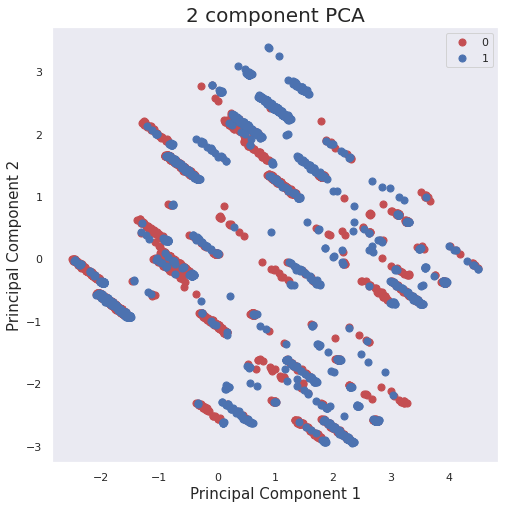

In [151]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df2_one_hot_encoded['LeaveOrNot'].unique()
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = predictor_concat_target['LeaveOrNot'] == target
    ax.scatter(predictor_concat_target.loc[indicesToKeep, 'Principal Component 1']
               , predictor_concat_target.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Soal 3

[10] Visualisasikan dataset tersebut dengan menggunakan t-SNE dan berikan juga alasan mengapa memilih hyperparameter tersebut! (2 komponen)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4653 samples in 0.011s...
[t-SNE] Computed neighbors for 4653 samples in 0.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4653
[t-SNE] Computed conditional probabilities for sample 2000 / 4653
[t-SNE] Computed conditional probabilities for sample 3000 / 4653
[t-SNE] Computed conditional probabilities for sample 4000 / 4653
[t-SNE] Computed conditional probabilities for sample 4653 / 4653
[t-SNE] Mean sigma: 0.599271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.296883
[t-SNE] KL divergence after 300 iterations: 1.283174


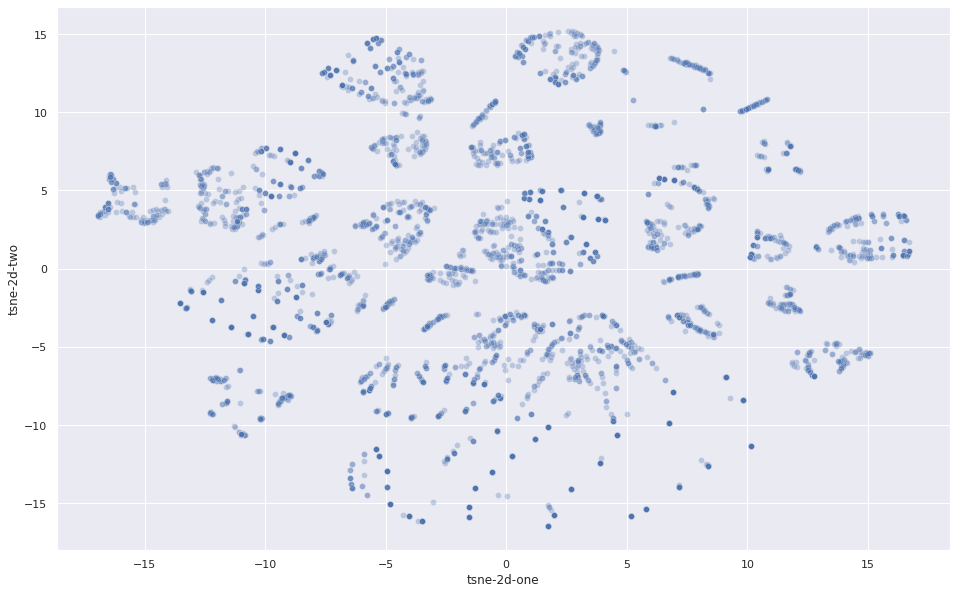

In [152]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)

result = x.copy()
tsne_result = tsne.fit_transform(sc_merged)
result['tsne-2d-one'] = tsne_result[:,0]
result['tsne-2d-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=result,
    legend="full",
    alpha=0.3
)

## Soal 4

[10] Berikan analisis singkat mengenai hasil visualisasi PCA dan t-SNE di atas! (minimal 3 kalimat)

Pada PCA dengan 2 component, hasil yang didapatkan tidaklah begitu jelas. Sulit untuk membedakan clustering antara mereka yang decide untuk leave atau stay. Dalam hal ini leave divisualisasikan dengan warna merah dan stay divisualisasikan dengan warna biru. Hasil clustering pada PCA sangat ditentukan pada jumlah component. Terkait penjelasan lebih lanjut akan saya paparkan pada nomor 5.

Hal yang didapat berbeda dengan t-SNE. Sama seperti PCA, pada t-SNE menggunakan 2 component namun dengan beberapa variasi khusus seperti perplexity sebesar 40 dan iterasi sebanyak 3000. Hasil yang didapat pada t-SNE sekilas lebih baik ketimbang PCA. Pada t-SNE sudah terlihat lebih baik clusteringnya, hal ini dapat dilihat dari tingkat hue yang berbeda. Saya cukup yakin apabila jumlah iterasi pada t-SNE ditingkatkan, akan menghasilkan clustering yang lebih baik. Namun mengingat terbatas pada RAM maka 300 dirasa cukup.

## Soal 5
[10] Apakah 2 komponen PCA sudah cukup untuk menggambarkan data dengan baik? Berikan alasannya dan berikan jumlah komponen yang sebaiknya digunakan beserta alasan mengapa memilih jumlah komponen tersebut!

Berdasarkan hasil yang saya dapat, PCA dengan 2 komponen menghasilkan visualisasi yang kurang baik. Kenapa demikian? Pada kasus nomor 2 terkait visualisasi dataset menggunakan PCA, sulit untuk melihat clustering antara mereka yang decide untuk leave dan stay. Pada kasus leave, divisualisasikan dengan warna merah dan stay divisualisasikan dengan warna biru.

Hasil yang didapat justru keduanya tampak saling timpa satu sama lain. Pada beberapa area, terdapat warna biru yang dominan sehingga menimpa warna merah. Juga pada area lain terdapat warna merah yang dominan sehingga menimpa warna biru.

Berdasarkan sumber yang saya baca, hal ini disebabkan karena PCA berkaitan erat dengan jumlah komponennya. Jumlah komponen disini berkaitan dengan besaran total variasi yang dapat dicakup oleh data hasil pca tersebut. Maka dari itu, dapat disimpulkan bahwa pada PCA kualitas hasil clustering dipengaruhi oleh besaran variasi data pada pca tersebut.

Terkait jumlah komponen secara exact saya tidak dapat memberikan secara pasti, namun yang dapat saya sampaikan adalah semakin banyak component yang dicakup oleh PCA, maka hasil yang didapat akan semakin baik. Pada kasus nomor 2, terdapat 14 attribute yang kemudian dicompress menjadi 2 attribute. Mungkin akan lebih baik apabila dari 14 attribute dicompress menjadi 7 atau mungkin 10 component.

In [153]:
pca_2 = PCA(n_components = 2)
pca_result_2 = pca_2.fit_transform(sc_merged)
print("Result PCA 2 Components: ", np.sum(pca_2.explained_variance_ratio_))

pca_7 = PCA(n_components = 7)
pca_result_7 = pca_7.fit_transform(sc_merged)
print("Result PCA 7 Components: ", np.sum(pca_7.explained_variance_ratio_))

pca_10 = PCA(n_components = 10)
pca_result_10 = pca_10.fit_transform(sc_merged)
print("Result PCA 10 Components: ", np.sum(pca_10.explained_variance_ratio_))

Result PCA 2 Components:  0.34895099850110245
Result PCA 7 Components:  0.8217112430491018
Result PCA 10 Components:  1.0000000000000004


Dapat dilihat pada code diatas bahwa apabila PCA dicompress menjadi 2 component, maka pada data tersebut hanya mencakup sekitar 35% dari total variasi pada dataset. Sedangkan apabila menjadi 7 component, maka mencakup sekitar 82% dari total variasi pada dataset. Lebih baik lagi apabila dicompress menjadi 10 component, hasil yang didapat mencakup sekitar 99% dari total variasi pada dataset.

Dengan demikian wajar apabila hasil visualisasi yang didapat pada nomor 2 kurang baik, karena pada data hasil PCA tersebut hanya mencakup sekitar 35% dari total variasi pada dataset.